In [52]:
# Import Libraries and Datasets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
#sub = pd.read_csv('/content/drive/MyDrive/SampleSubmission_enzyme.csv')
print('%d is the number of rows in the train dataset' %train.shape[0])

937 is the number of rows in the train dataset


In [54]:
train.head()

,mutated_sequence,mutant,Carboxy 4-methylumbelliferyl phosphate ester (cMUP),methyl phosphate (MeP),methyl phosphodiester (MecMUP)
0,MDIGIDSDPQKTNAVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGF...,WT,1400000,610000,16.0
1,MDIGIDSDPQKTNAVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGF...,S115G,820000,380000,24.0
2,MDIGIDSDPQKTNAVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGF...,L56V,1100000,210000,8.7
3,MDIGIDSDPQKTNAVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGF...,L314G,22000,4100,1.3
4,MDIGIDSDPQKTNAVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGF...,G278A,1100000,180000,12.0


In [55]:
test.head()

,mutated_sequence,mutant,Carboxy 4-methylumbelliferyl phosphate ester (cMUP),methyl phosphate (MeP),methyl phosphodiester (MecMUP)
0,MDIGIDSDPQKTNAVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGF...,G228A,0.393,0.393,0.393
1,MDIGIDSDPQKTNAVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGF...,G491A,0.393,0.393,0.393
2,MDIGIDSDPQKTNAVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGF...,M387V,0.393,0.393,0.393
3,MDIGIDSDPQKGLVVDQMRWDYLYRYYSKYGEGGFKRMLNTGYSLN...,T12G,0.393,0.393,0.393
4,MDIGIDSDPQKTNAVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGF...,E430V,0.393,0.393,0.393


In [56]:
# Check NA counts
train.isnull().sum()

mutated_sequence                                       0
mutant                                                 0
Carboxy 4-methylumbelliferyl phosphate ester (cMUP)    0
methyl phosphate (MeP)                                 0
methyl phosphodiester (MecMUP)                         0
dtype: int64

In [57]:
# Drop rows with missing values
train= train.dropna()
print('%d is the number of enzymes that have label and sequence' %train.shape[0])

937 is the number of enzymes that have label and sequence


Lastly, it's important to look at the types of family groups that clasification can be.


In [58]:
# # Look at classification type counts
# counts = train.LABEL.value_counts()
# print(counts)

# #plot counts
# plt.figure()
# sns.distplot(counts, hist = False, color = 'purple')
# plt.title('Count Distribution for Family Types')
# plt.ylabel('% of records')
# plt.show()

In [9]:
# # Get classification types where counts are over 10000
# types = np.asarray(counts[(counts > 10000)].index)

# # Filter dataset's records for classification types > 10000
# data = train[train.LABEL.isin(types)]

# print(types)
# print('%d is the number of records in the final filtered dataset' %data.shape[0])

# ----- Train Test Split -----

In [11]:
# Split Data
X_train, X_test,y_train,y_test = train_test_split(train['mutated_sequence'], train['Carboxy 4-methylumbelliferyl phosphate ester (cMUP)'], test_size = 0.2, random_state = 1)

# Create a Count Vectorizer to gather the unique elements in sequence
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4))

# Fit and Transform CountVectorizer
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

#Print a few of the features
print(vect.get_feature_names_out()[-20:])

['yvlv' 'yvmt' 'yvmv' 'yvnk' 'yvpg' 'yvpt' 'yvpv' 'yvrm' 'yvts' 'yvvd'
 'yvve' 'yvvt' 'yvvw' 'yvyd' 'yygn' 'yysg' 'yysk' 'yytg' 'yytk' 'yyvn']


#------ Machine Learning Models ------

#MultinomialNB:

In [14]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE


In [15]:
# Make a prediction dictionary to store accuracys
prediction = dict()

# Naive Bayes Model
#from sklearn.naive_bayes import MultinomialNB
model = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
model.fit(X_train_df, y_train)
y_pred = model.predict(X_test_df)
prediction["MultinomialNB"] = np.sqrt(MSE(y_test, y_pred))
print( prediction['MultinomialNB'])

[22:02:38] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
773234.8445749626


In [ ]:
#Allsub = pd.DataFrame({'SEQUENCE_ID':test['SEQUENCE_ID'],
#                       'LABEL':sub_test_pred})
#Allsub.to_csv("Submission_MultinomialNB.csv", index = False)

## Using Protein Bert

In [59]:
! pip install transformers

In [60]:
from transformers import BertModel, BertTokenizer

# Load the ProteinBERT model and tokenizer
model_name = "Rostlab/prot_bert_bfd"
model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)
embeddings_data = []

# Example protein sequence
for protein_sequence in train['mutated_sequence']:

  #protein_sequence = "MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYISKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV"

  # Tokenize the protein sequence
  tokens = tokenizer.encode_plus(protein_sequence, padding=True, truncation=True, return_tensors="pt")

  # Get the input tensors
  input_ids = tokens['input_ids']  # Tensor of token IDs
  attention_mask = tokens['attention_mask']  # Tensor indicating which tokens to attend to

  # Forward pass through the model
  outputs = model(input_ids, attention_mask=attention_mask)

  # Get the embeddings for the whole protein sequence
  embeddings = outputs.last_hidden_state
  embeddings_data.append(embeddings)



Some weights of the model checkpoint at Rostlab/prot_bert_bfd were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Defa

In [86]:
from transformers import BertModel, BertTokenizer

# Load the ProteinBERT model and tokenizer
model_name = "Rostlab/prot_bert_bfd"
model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

test_embeddings_data = []
for protein_sequence in test['mutated_sequence']:

  #protein_sequence = "MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYISKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV"

  # Tokenize the protein sequence
  tokens = tokenizer.encode_plus(protein_sequence, padding=True, truncation=True, return_tensors="pt")

  # Get the input tensors
  input_ids = tokens['input_ids']  # Tensor of token IDs
  attention_mask = tokens['attention_mask']  # Tensor indicating which tokens to attend to

  # Forward pass through the model
  outputs = model(input_ids, attention_mask=attention_mask)

  # Get the embeddings for the whole protein sequence
  embeddings = outputs.last_hidden_state
  test_embeddings_data.append(embeddings)

Some weights of the model checkpoint at Rostlab/prot_bert_bfd were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Defa

In [61]:
import pickle
from os.path import join as pjoin

In [15]:
dir = 'data/'
file_1 = 'embeddings_protein_bert_train_data.pkl'

path_embeddings = pjoin(dir,file_1)
with open(path_embeddings, 'wb') as f:
  pickle.dump(embeddings_data, f)

In [87]:
dir = 'data/'
file_1 = 'embeddings_protein_bert_test_data.pkl'

path_embeddings = pjoin(dir,file_1)
with open(path_embeddings, 'wb') as g:
  pickle.dump(test_embeddings_data, g)

g.close()

In [73]:
import torch

In [77]:
# Assuming the given list of tensors is named "tensor_list"
tensor_list = [torch.tensor([[1, 2], [3, 4]]), torch.tensor([[5, 6], [7, 8]])]

# Concatenate the tensors along the desired dimension (0 in this case)
#concatenated_tensor = torch.cat(tensor_list, dim=1)

# Flatten the concatenated tensor
flattened_tensor = [elt.view(-1) for elt in tensor_list]

# Printing the flattened tensor
print(flattened_tensor)

[tensor([1, 2, 3, 4]), tensor([5, 6, 7, 8])]


In [79]:
len(embeddings_data[0].flatten().tolist())

3072

In [81]:
# Flatten the embeddings
train_flattened_embeddings = [elt.flatten().tolist() for elt in embeddings_data]
len(train_flattened_embeddings)

# test_flattened_embeddings = embeddings.reshape(test_embeddings.shape[0], -1)
# test_flattened_embeddings

937

In [88]:
test_flattened_embeddings = [elt.flatten().tolist() for elt in test_embeddings_data]
len(test_flattened_embeddings)

103

In [82]:
# from sklearn.model_selection import train_test_split

# # Split the data into training and validation sets
X_train, y_train = train_flattened_embeddings, train['Carboxy 4-methylumbelliferyl phosphate ester (cMUP)']
#X_test, y_test = test['mutated_sequence'], test['Carboxy 4-methylumbelliferyl phosphate ester (cMUP)']

In [89]:
X_test, y_test = test_flattened_embeddings, test['Carboxy 4-methylumbelliferyl phosphate ester (cMUP)']

### Using XGBoost Regressor

In [91]:
import xgboost as xg
from sklearn.metrics import mean_squared_error


# Initialize regression model
model = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

# Train the model
model.fit(X_train, y_train)

# Make predictions on training set
y_xpred = model.predict(X_train)



[01:18:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [92]:
# Evaluate on validation set
y_pred = model.predict(X_test)
val_mse = mean_squared_error(y_test, y_pred)

In [93]:
val_mse

1080365055268.8949

### Using SVR

In [94]:
from sklearn.svm import SVR

In [95]:
# Initialize regression model
regressor = SVR(kernel='rbf')

# Train the model
regressor.fit(X_train, y_train)

# Evaluate on validation set
y_pred = regressor.predict(X_test)

#compute the mse
val_mse = mean_squared_error(y_test, y_pred)

In [96]:
val_mse

1209998915400.2432

### Using Random Forest Regression


In [97]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
# Initialize regression model
regressor = RandomForestClassifier(n_estimators=100, max_features="auto", random_state=44)

# Train the model
regressor.fit(X_train, y_train)

# Evaluate on validation set
y_pred = regressor.predict(X_test)

#compute the mse
val_mse = mean_squared_error(y_test, y_pred)

/Users/ndjebayidamarisstephanie/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [100]:
val_mse

1959998899600.155

# Adaboost:

In [ ]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
model2 = AdaBoostClassifier()
model2.fit(X_train_df,y_train)
ADA_pred = model2.predict(X_test_df)
prediction["Adaboost"] = accuracy_score(ADA_pred , y_test)
print(prediction["Adaboost"])

0.3707876289620159


In [ ]:
#sub_test = test.drop(['SEQUENCE_ID'], axis =1)
#sub_test_pred = model2.predict(sub_test)

In [ ]:
#Allsub = pd.DataFrame({'SEQUENCE_ID':test['SEQUENCE_ID'],
#                       'LABEL':sub_test_pred})
#Allsub.to_csv("Submission_Adaboost.csv", index = False)

#Plot Confusion Matrix for MultinomialNB:

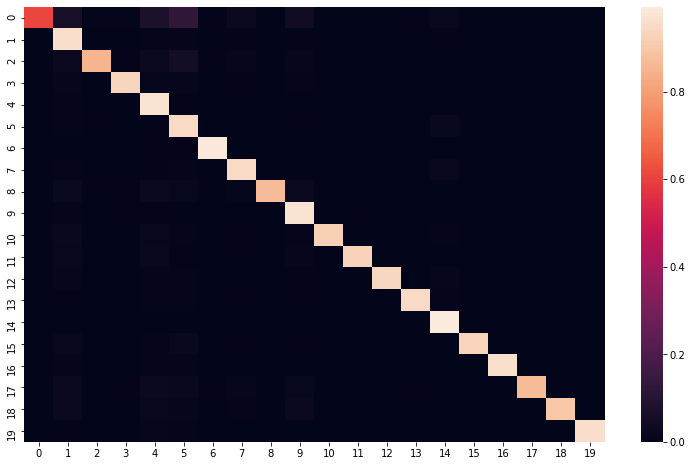

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, NB_pred, labels = types)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

The confusion matrix shows label index 3 being misclassified as index 38 quite a bit. Based on the names listed below, it makes sense for these two to be confused.


In [ ]:
#print(types[16])
#print(types[12])

Lastly, a matrix of the classification report to show case metrics for each class should be insightful


In [ ]:
#Print F1 score metrics
print(classification_report(y_test, NB_pred, target_names = types))

              precision    recall  f1-score   support

     class19       0.98      0.96      0.97      2252
     class11       1.00      0.87      0.93      7204
      class2       0.68      0.97      0.80      7040
      class6       0.72      0.96      0.82     12602
      class8       0.48      0.95      0.63      7551
     class12       0.98      0.94      0.96      5865
      class5       0.99      0.93      0.96      3516
      class9       0.99      0.87      0.93      2802
      class1       0.92      0.95      0.93      5527
     class10       1.00      0.96      0.98      2946
      class3       0.99      0.90      0.94      2590
      class4       1.00      0.61      0.76     51456
     class13       0.92      0.85      0.88     10533
     class16       0.98      0.92      0.95      6579
      class7       0.99      0.93      0.96      6506
     class14       0.92      0.99      0.96      7358
     class17       0.92      0.94      0.93      9434
     class15       0.71    

#Reasons for Model Error
Proteins in general can be a type of enzyme, or a signaling protein, structural, and various other choices. A lof of proteins tend to share very similar characteristics, as some proteins are meant to bind in similar regions as others. For example, a Hydrolase enzyme and a Hydrolase inhibitor protein are going to have similar structures as they will target very similar areas. This is reflected in the confusion matrix and heat map. Gene regulator proteins will have a similarity to RNA binding proteins, DNA binding proteins, as well as transcription proteins. The biggest thing to note as well, as the model only uses features of 4 amino acids at most. The possibility of utilizing amino acids of higher degree in theory should be able to create an even higher accuracy.

#Future Work
There is definitely room for improvement for the model. Utilizing factors such as pH, molecular weight, and other components may be able to yield more information on family group. Furthermore, if possible, increase the length of the ngram_range to include more than just 4 characters to allow for higher interaction between the amino acids as reflected in reality